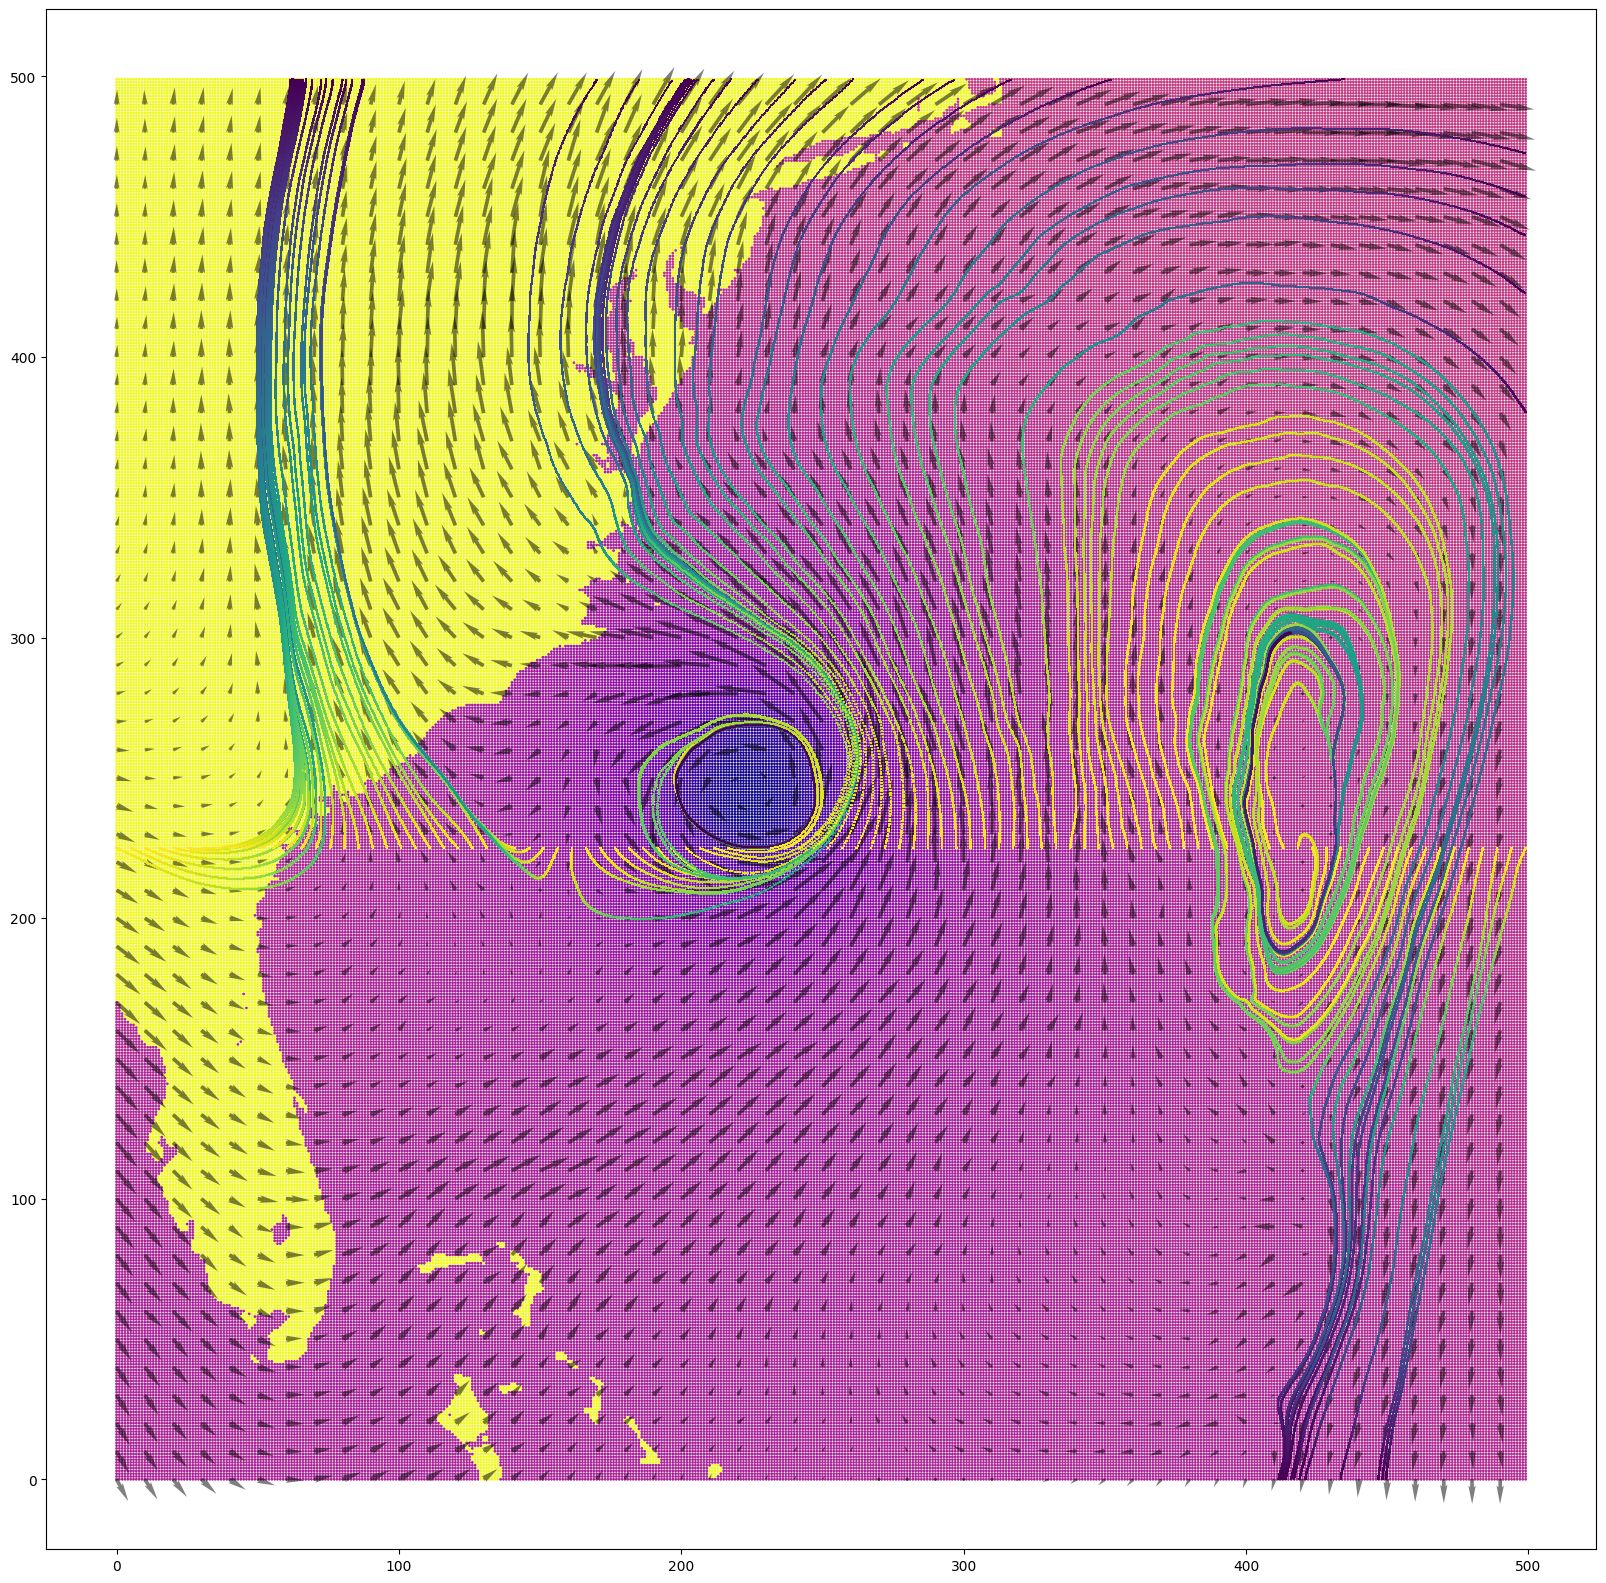

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

uData = []
vData = []

# data loading and setup/plot image
# argument "showBgMap": show or not to show the background map
# DO NOT modify this function


def Initialize(showBgMap=False):
    global uData
    global vData

    loadFlowData = np.load("flowData.npy", allow_pickle=True)

    # flow data
    uData = loadFlowData.item().get('uData')
    vData = loadFlowData.item().get('vData')

    plt.rcParams['figure.figsize'] = [20, 20]

    # plot backgroup images
    presMapX = loadFlowData.item().get('presMapX')
    presMapY = loadFlowData.item().get('presMapY')
    presMapV = loadFlowData.item().get('presMapV')
    if showBgMap == True:
        plt.scatter(presMapX, presMapY, s=1, c=presMapV, cmap='plasma')

    # plot arrows
    x_pos = loadFlowData.item().get('x_pos')
    y_pos = loadFlowData.item().get('y_pos')
    x_direct = loadFlowData.item().get('x_direct')
    y_direct = loadFlowData.item().get('y_direct')
    plt.quiver(x_pos, y_pos, x_direct, y_direct, scale=50,
               headwidth=2, headlength=5, alpha=0.5)


# x, y: location. Return: 2D vector at [x,y] (x and y are integer only)
# return: a 2D vector [u, v], u is horizontal direction (right is postivie), v is the vertical direction (up is positive)
# DO NOT modify this function
def getDataVector(x, y):
    idx = (499-y)+500*x
    return uData[idx], vData[idx]


# this function generates "numSeeds" points(seeds) from [startX, startY] to [endX, endY]
# Return: seeds -> a list of [x, y]
def generateSeeds(startX, startY, endX, endY, numSeeds):
    seeds = []
    x = np.linspace(startX, endX, numSeeds)
    y = np.linspace(startY, endY, numSeeds)
    seeds = np.zeros([numSeeds, 2])
    seeds[:, 0] = x
    seeds[:, 1] = y
    return seeds

# this function plot a particle tracing result on the screen
# argument "path": particle tracing result. It is represetned by a list of [x, y]. (x, y) can be floating point
# You may not want to modify this function


def drawOneParticleTracingResult(path):
    ps = np.array(path)
    c = np.linspace(1, 0, num=ps.shape[0])
    plt.scatter(ps[:, 0], ps[:, 1], c=c, s=3, marker='_')

# (TODO) WORK on this function
# compute ONE particle tracing result
# you should use "getDataVector())" to get the vector you want on the grid point
# if you need the vector between grid points, you have to implment the vector interpolation by your self
# I do not mind the computation is efficnet or not
# "seed": one seed (x,y)
# "t": delta t (i suggest 0.025)
# "steps": how many stesp for this particle tracing process


def lerp(a, b, alpha):
    return [a[0] + alpha * (b[0] - a[0]), a[1] + alpha * (b[1] - a[1])]


def interpolateVector(x, y):
    x1, x2 = max(min(math.floor(x), 499), 0), max(min(math.ceil(x), 499), 0)
    y1, y2 = max(min(math.floor(y), 499), 0), max(min(math.ceil(y), 499), 0)

    alpha_x = x - math.floor(x)
    alpha_y = y - math.floor(y)

    return lerp(
        lerp([*getDataVector(x1, y1)], [*getDataVector(x2, y1)], alpha_x),
        lerp([*getDataVector(x1, y2)], [*getDataVector(x2, y2)], alpha_x),
        alpha_y
    )


def particleTrace(seed, t, steps):
    path = [seed]
    for i in range(steps):
        [x, y] = path[i]
        k1 = [*interpolateVector(x, y)]
        k2 = [*interpolateVector(x + k1[0] * t / 2, y + k1[1] * t / 2)]
        k3 = [*interpolateVector(x + k2[0] * t / 2, y + k2[1] * t / 2)]
        k4 = [*interpolateVector(x + k3[0] * t / 2, y + k3[1] * t / 2)]
        x += (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) * t / 6
        y += (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) * t / 6
        if x < 0 or x > 499 or y < 0 or y > 499:
            break
        path.append([x, y])
    return path


# main (if you want, you can change the arguments in the generateSeeds() and the last argument in particleTrace() )
# set False to disable backgroup image display (faster a little bit)
Initialize(True)

# this line generates seeds (seeds to generate the graph on the homework description slides)
seeds = generateSeeds(0, 225, 499, 225, 100)
# seeds = generateSeeds(230, 225, 230, 225, 1)
# seeds = generateSeeds(0, 499, 499, 0, 100)

for seed in seeds:  # iterate through all seeds
    # compute one particle tracing of the "seed", result is a list of [x,y ]
    path = particleTrace(seed, 0.025, 10000)
    drawOneParticleTracingResult(path)  # draw one particle path

plt.show()
